#        MID COURSE ASSESSMENT

###                      MACHINE LEARNING

####                             BANK CHURN PREDICTION

## Objective

##### Main aim of this project is to predict whether a person will leave the bank services i.e. he/she will churn or not using ML and auto ML techniques

## What is churn?

In general, Churn is expressed as a degree of customer inactivity and disengagement, observed over a given time. This menifests within the data in various forms such as the recency of account actions or change in the account balance

## Aim of the project

We aim to accomplish the following for this study:

1. Identify and visualise which factors contribute to customer Churn.

2. Build the prediction model that will perform the following:
    
    > Classify if a customer is going to churn or not.
    
    > Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging Fruits in thier efforts to prevent churn.

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Mount Google Drive into colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading the dataset

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

First view of the data

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Removing unnecessary Columns

In [5]:
df.drop(['CustomerId','RowNumber','Surname'],axis=1,inplace=True)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


#### Data Analysis

In [8]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

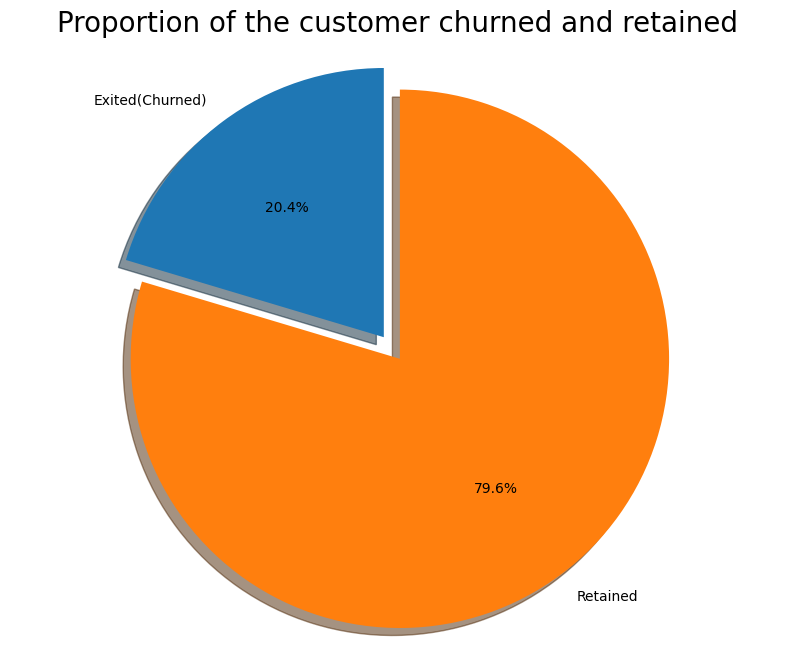

In [9]:
labels='Exited(Churned)','Retained'
sizes=[df.Exited[df['Exited']==1].count(),df.Exited[df['Exited']==0].count()]
explode=(0,0.1)
fig1,ax1=plt.subplots(figsize=(10,8))
ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
ax1.axis('equal')
plt.title('Proportion of the customer churned and retained',size=20)
plt.show()

In [10]:
import seaborn as sns

<Axes: xlabel='IsActiveMember', ylabel='count'>

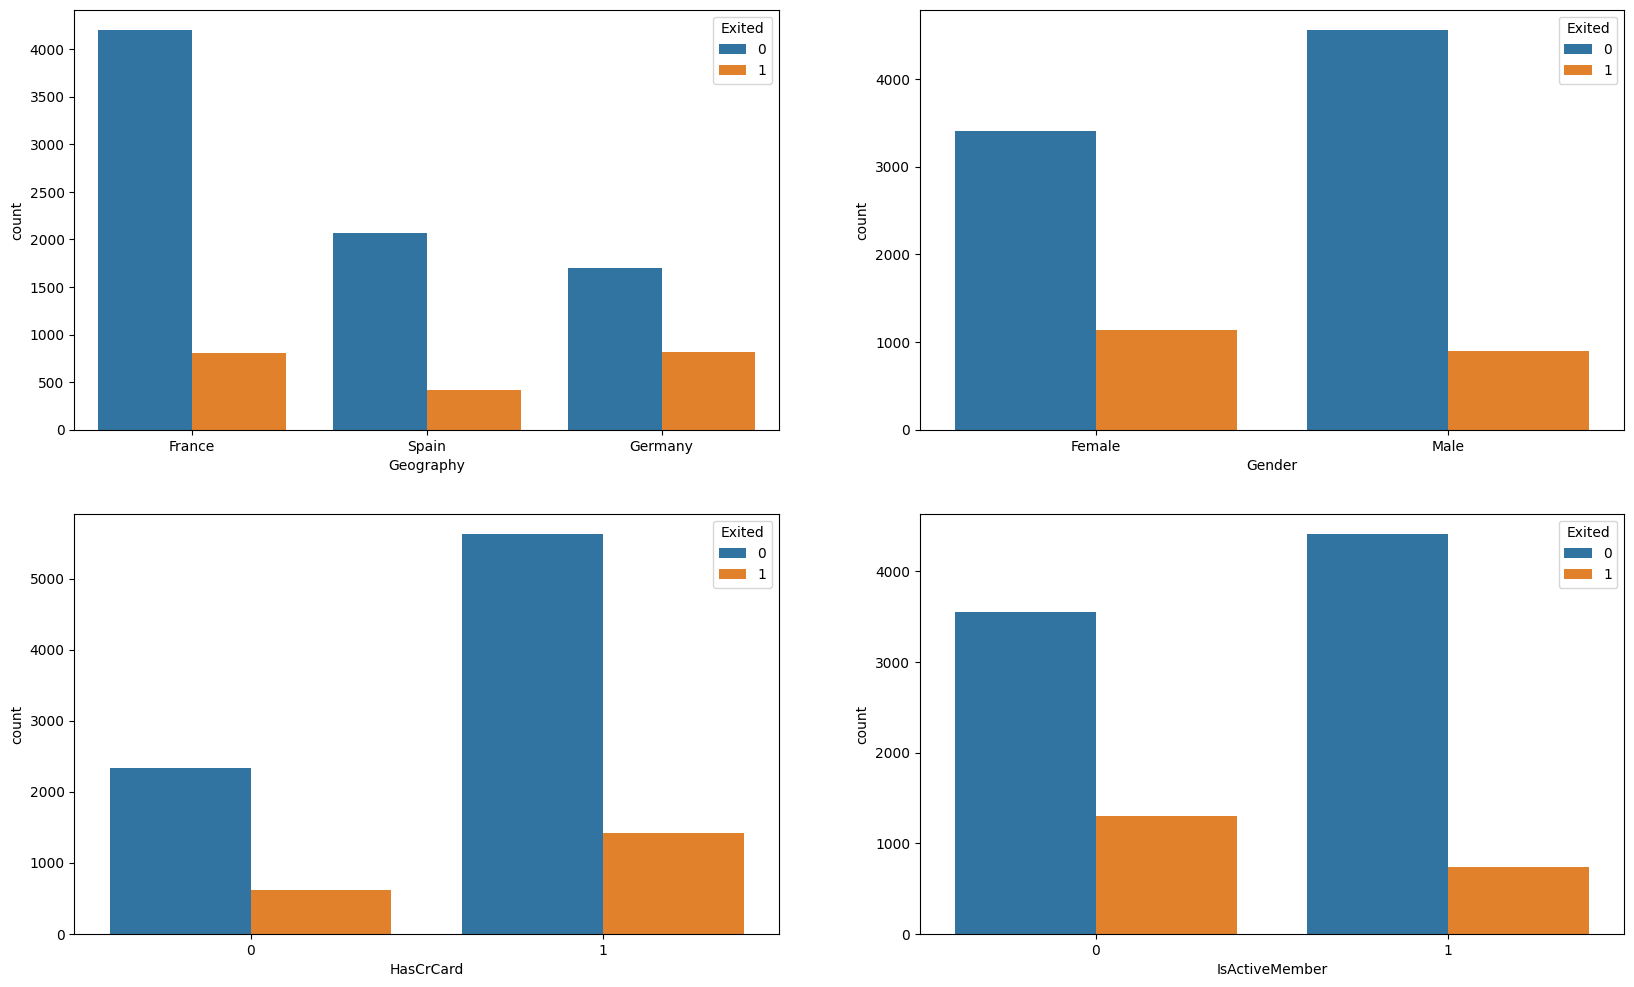

In [11]:
fig, axarr=plt.subplots(2,2,figsize=(20,12))
sns.countplot(x='Geography',hue='Exited',data=df,ax=axarr[0][0])
sns.countplot(x='Gender',hue='Exited',data=df,ax=axarr[0][1])
sns.countplot(x='HasCrCard',hue='Exited',data=df,ax=axarr[1][0])
sns.countplot(x='IsActiveMember',hue='Exited',data=df,ax=axarr[1][1])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

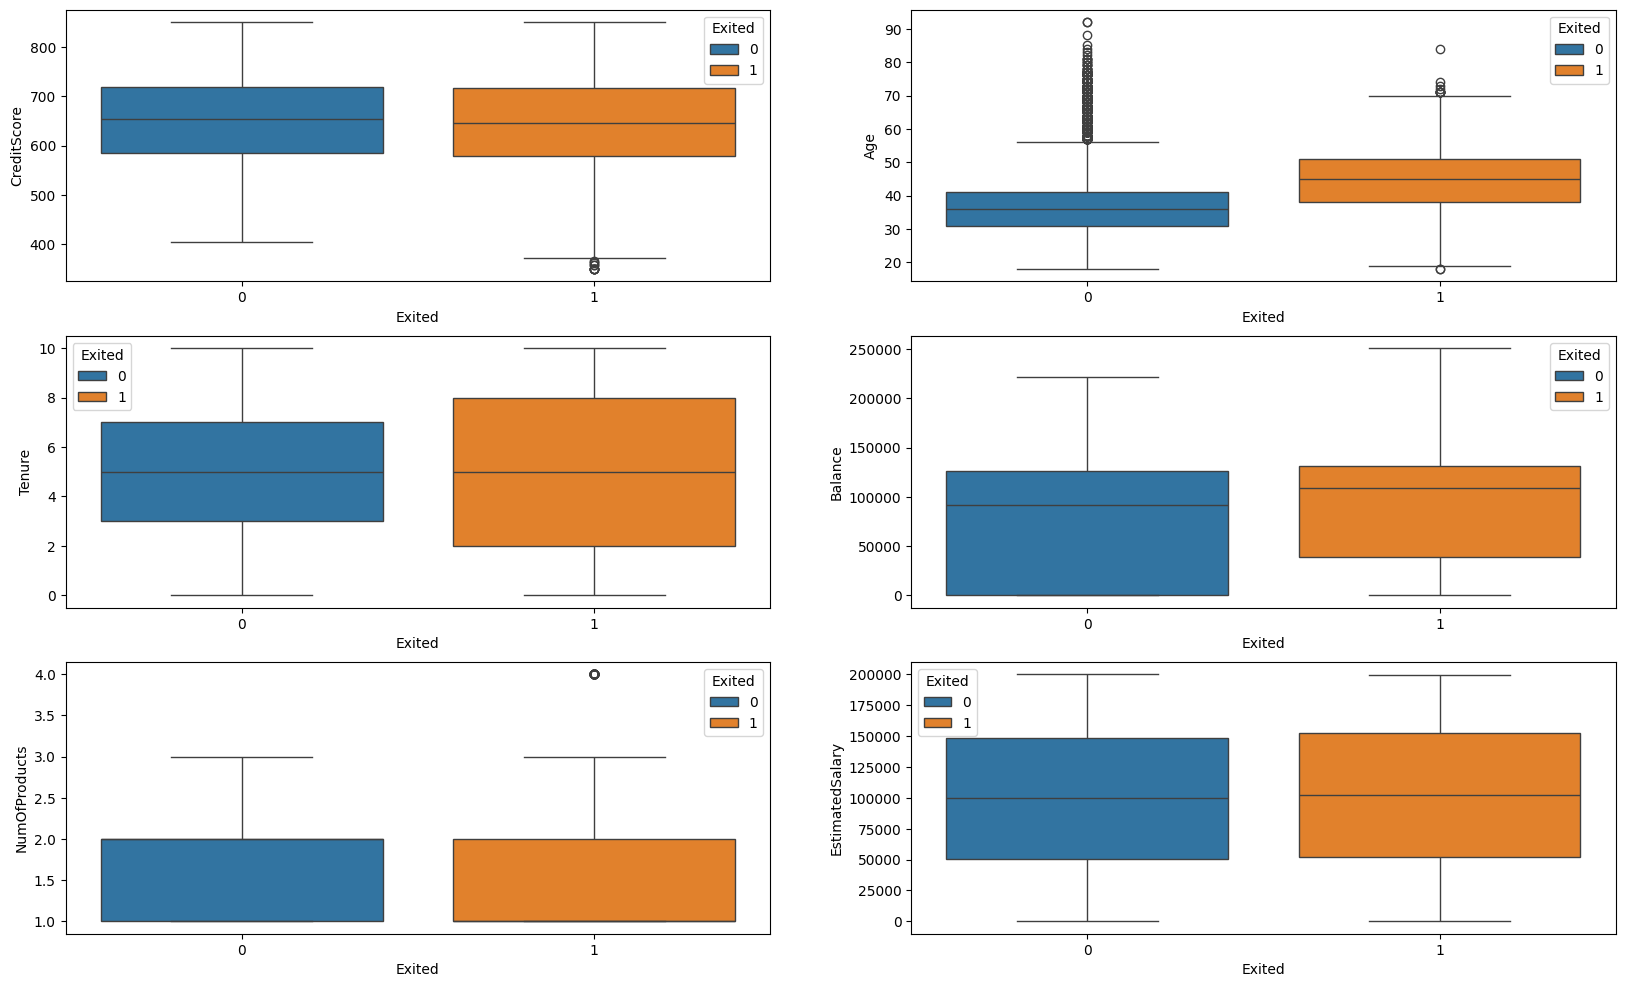

In [12]:
fig, axarr=plt.subplots(3,2,figsize=(20,12))
sns.boxplot(y='CreditScore',x='Exited',hue='Exited',data=df,ax=axarr[0][0])
sns.boxplot(y='Age',x='Exited',hue='Exited',data=df,ax=axarr[0][1])
sns.boxplot(y='Tenure',x='Exited',hue='Exited',data=df,ax=axarr[1][0])
sns.boxplot(y='Balance',x='Exited',hue='Exited',data=df,ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x='Exited',hue='Exited',data=df,ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x='Exited',hue='Exited',data=df,ax=axarr[2][1])

## Feature Engineering

#### Making a new column BalanceSalaryRatio

(-1.0, 5.0)

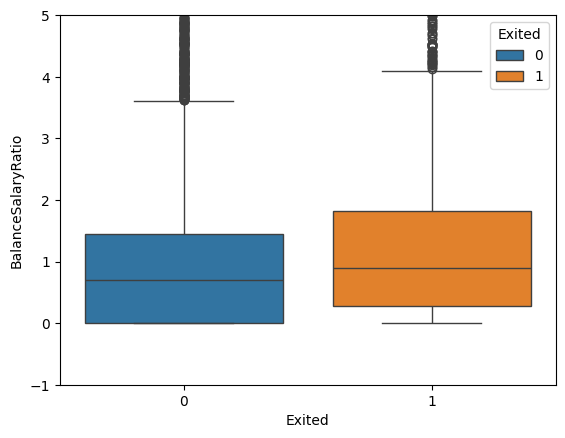

In [13]:
df['BalanceSalaryRatio']=df.Balance/df.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x='Exited',hue='Exited',data=df)
plt.ylim(-1,5)

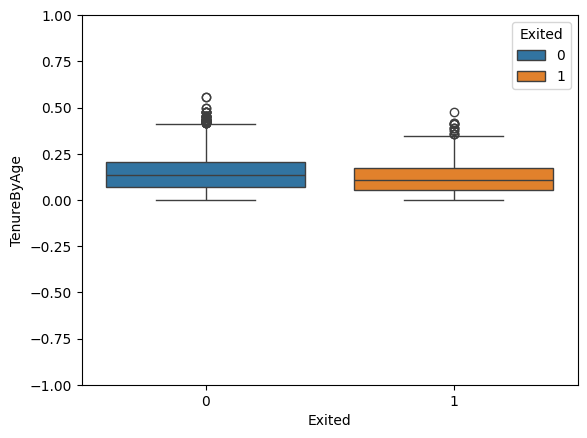

In [14]:
df['TenureByAge']=df.Tenure/(df.Age)
sns.boxplot(y='TenureByAge',x='Exited',hue='Exited',data=df)
plt.ylim(-1,1)
plt.show()

#### Printing the Categorical variables

In [15]:
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes=='object':
      print(f'{column}:{df[column].unique()}')

In [16]:
print_unique_col_values(df)

Geography:['France' 'Spain' 'Germany']
Gender:['Female' 'Male']


#### Label Encoding

In [17]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)

#### One Hot Encoding method

In [18]:
df1=pd.get_dummies(data=df, columns=['Geography']).astype('int')
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0,1,1,1,101348,1,0,0,1,0,0
1,608,0,41,1,83807,1,0,1,112542,0,0,0,0,0,1
2,502,0,42,8,159660,3,1,0,113931,1,1,0,1,0,0
3,699,0,39,1,0,2,0,0,93826,0,0,0,1,0,0
4,850,0,43,2,125510,1,1,1,79084,0,1,0,0,0,1


### Standardizing the data

In [19]:
scale_var=['Tenure','CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler=MinMaxScaler()

In [22]:
df1[scale_var]=scaler.fit_transform(df1[scale_var])

In [23]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506733,1,0,0,1,0,0
1,0.516,0,0.310811,0.1,0.334028,0.000000,0,1,0.562708,0,0,0,0,0,1
2,0.304,0,0.324324,0.8,0.636354,0.666667,1,0,0.569654,1,1,0,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0,0,1,0,0
4,1.000,0,0.337838,0.2,0.500243,0.000000,1,1,0.395403,0,1,0,0,0,1


### Dependent and Independent variables

In [24]:
X=df1.drop('Exited',axis=1)
y=df1['Exited']

### Importing ML libraries

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=5)

In [27]:
print('X train shape',X_train.shape)
print('X test shape',X_test.shape)
print('y train shape',y_train.shape)
print('y test shape',y_test.shape)

X train shape (7500, 14)
X test shape (2500, 14)
y train shape (7500,)
y test shape (2500,)


### Model Building and Prediction

#### The Sequential Model

A sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output Tensor.

In [28]:
import tensorflow as tf
from tensorflow import keras

In [29]:
model=keras.Sequential([
    keras.layers.Dense(32,input_shape=(14,),activation='relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')

])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [39]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
235/235 [==============================] - 2s 8ms/step - loss: 0.3354 - accuracy: 0.8637
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3349 - accuracy: 0.8625
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3350 - accuracy: 0.8632
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3354 - accuracy: 0.8619
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3406 - accuracy: 0.8628
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3354 - accuracy: 0.8656
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3348 - accuracy: 0.8632
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3342 - accuracy: 0.8644
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3329 - accuracy: 0.8665
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3359 - accura

In [31]:
model.evaluate(X_test,y_test)

79/79 [==============================] - 0s 2ms/step - loss: 0.3663 - accuracy: 0.8500


[0.36629000306129456, 0.8500000238418579]

In [32]:
yp=model.predict(X_test)
yp

79/79 [==============================] - 0s 2ms/step


array([[0.03388968],
       [0.10594188],
       [0.05703606],
       ...,
       [0.23653181],
       [0.15672058],
       [0.24032257]], dtype=float32)

### Converting our predictions to 0,1 to check accuracy

In [33]:
y_pred=[]
for element in yp:
  if element>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [34]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [35]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1999
           1       0.68      0.47      0.56       501

    accuracy                           0.85      2500
   macro avg       0.78      0.71      0.73      2500
weighted avg       0.84      0.85      0.84      2500



Text(95.72222222222221, 0.5, 'Truth')

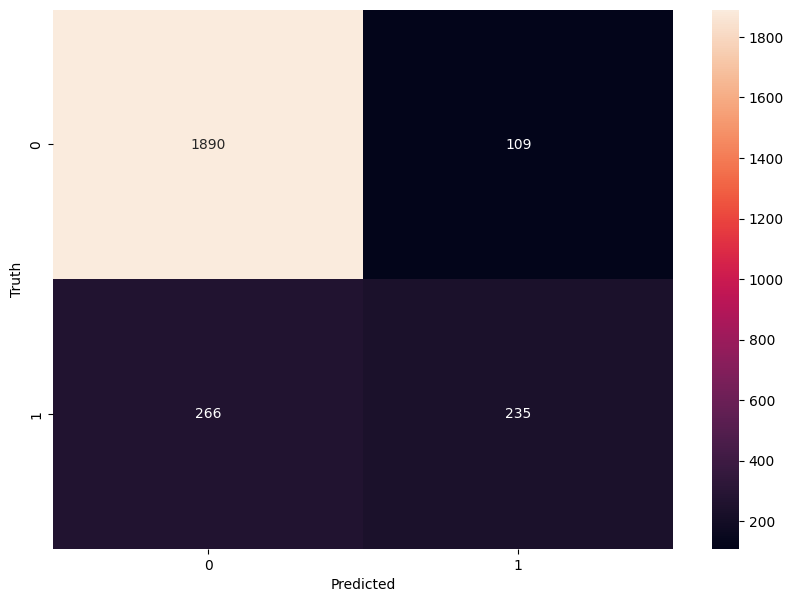

In [36]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
print(accuracy_score(y_test,y_pred)*100,'%')

85.0 %


## Project Report: Bank Customer Churn Prediction using Sequential ANN Model

####  **Introduction**:
Customer churn is a critical challenge faced by banks and financial institutions. Predicting churn can help banks take proactive measures to retain customers and maintain profitability. In this project, we utilized a Sequential Artificial Neural Network (ANN) model to predict customer churn based on various features such as credit score, gender, tenure, balance, number of products, and credit card usage.

####  **Model Architecture**:
We constructed a Sequential ANN model using Keras with the following architecture:

Input Layer: Number of neurons corresponding to the number of features in the dataset.
Hidden Layers: We experimented with different numbers of hidden layers and neurons to optimize model performance.
Output Layer: A single neuron with a sigmoid activation function, outputting the probability of churn.

#### **Training and Evaluation**:
The model was trained using the training dataset and evaluated on a separate validation set. We used accuracy as the primary evaluation metric. After training for multiple epochs, the model achieved an accuracy of 85.39% on the validation set, indicating its effectiveness in predicting customer churn.

#### **Conclusion**:
In this project, we successfully built and trained a Sequential ANN model to predict bank customer churn based on various features. The model demonstrated strong performance with an accuracy of 85.39%. By identifying potential churners, banks can implement targeted retention strategies, thereby reducing customer attrition and maintaining long-term profitability.

#### ***Overall, this project provides valuable insights into using machine learning techniques, specifically sequential ANN models, for bank customer churn prediction, offering a practical solution for financial institutions to mitigate customer attrition risks.***

## **Using Auto ML**

#### **H2O AUTO ML**

In [40]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [41]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.2-py2.py3-none-any.whl size=265365378 sha256=5ea4559e4d43e51b117d708083a2a8f696915545d960b33a7f04300d916d1497
  Stored in directory: /root/.cache/pip/wheels/63/14/f4/9fff736a0df59884631031b604e7b000a70409f5b7adafc2c6
Successfully built h2o


## Importing the h2o Python module and H2O AUTOML class

In [43]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpgy10_39r
  JVM stdout: /tmp/tmpgy10_39r/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpgy10_39r/h2o_unknownUser_started_from_python.err


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.2
H2O_cluster_version_age:,1 day
H2O_cluster_name:,H2O_from_python_unknownUser_zjnmu9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


### Loading Data

In [45]:
df=h2o.import_file('/content/drive/MyDrive/Churn_Modelling.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [46]:
df.head()

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1.56346e+07,Hargrave,619,France,Female,42,2,0,1,1,1,101349,1
2,1.56473e+07,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112543,0
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0
5,1.57379e+07,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084.1,0
6,1.5574e+07,Chu,645,Spain,Male,44,8,113756,2,1,0,149757,1
7,1.55925e+07,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0
8,1.56561e+07,Obinna,376,Germany,Female,29,4,115047,4,1,0,119347,1
9,1.57924e+07,He,501,France,Male,44,4,142051,2,0,1,74940.5,0
10,1.55924e+07,H?,684,France,Male,27,2,134604,1,1,1,71725.7,0


#### H2O AUTO ML can do all the data preprocessing techniques

In [47]:
df_train,df_test=df.split_frame(ratios=[.8])

### Splitting the data

In [48]:
y='Exited'
x=df.columns
x.remove(y)
x.remove('CustomerId')
x.remove('RowNumber')
x.remove('Surname')

### Defining the Model

In [50]:
aml=H2OAutoML(max_runtime_secs=300,max_models=10,seed=10,verbosity='info', nfolds=0)

#### Fitting the model

In [51]:
aml.train(x=x,y=y, training_frame=df_train)

AutoML progress: |
11:23:38.340: Project: AutoML_1_20240515_112338
11:23:38.341: Cross-validation disabled by user: no fold column nor nfolds > 1.
11:23:38.349: Setting stopping tolerance adaptively based on the training frame: 0.01122179684105992
11:23:38.350: Build control seed: 10
11:23:38.355: Since cross-validation is disabled, and validation frame(s) were not provided, automatically split the training data into training, validation frame(s) in the ratio 90/10/0.
11:23:38.580: training frame: Frame key: AutoML_1_20240515_112338_training_py_3_sid_b4c1    cols: 14    rows: 7156  chunks: 8    size: 465130  checksum: 4433847097233467398
11:23:38.594: validation frame: Frame key: AutoML_1_20240515_112338_validation_py_3_sid_b4c1    cols: 14    rows: 785  chunks: 8    size: 270816  checksum: -8859652735762071872
11:23:38.595: leaderboard frame: Frame key: AutoML_1_20240515_112338_validation_py_3_sid_b4c1    cols: 14    rows: 785  chunks: 8    size: 270816  checksum: -8859652735762071872

,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,40.0,40.0,31941.0,7.0,7.0,7.0,28.0,108.0,58.875
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2024-05-15 11:24:01,0.004 sec,0.0,0.4054289,0.3287452,0.1643726,0.3906394,0.3169717,0.1525991
,2024-05-15 11:24:01,0.248 sec,5.0,0.3504441,0.2778161,0.1228110,0.3380086,0.2695834,0.1142498
,2024-05-15 11:24:01,0.445 sec,10.0,0.3253066,0.2478898,0.1058244,0.3156177,0.2414155,0.0996145
,2024-05-15 11:24:01,0.608 sec,15.0,0.3112523,0.2279053,0.0968780,0.3080584,0.2256385,0.0949000
,2024-05-15 11:24:01,0.749 sec,20.0,0.3021568,0.2122959,0.0912988,0.3030384,0.2121720,0.0918323
,2024-05-15 11:24:02,0.906 sec,25.0,0.2963069,0.2025434,0.0877978,0.3031445,0.2057503,0.0918966
,2024-05-15 11:24:02,1.059 sec,30.0,0.2917507,0.1954689,0.0851185,0.3035813,0.2019255,0.0921616
,2024-05-15 11:24:02,1.235 sec,35.0,0.2892815,0.1916705,0.0836838,0.3036796,0.1996932,0.0922213


In [52]:
lb=aml.leaderboard
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_2_AutoML_1_20240515_112338,0.303884,0.0923452,0.197702,0.216945,0.0923452
GBM_1_AutoML_1_20240515_112338,0.303896,0.0923527,0.201833,0.216752,0.0923527
GBM_3_AutoML_1_20240515_112338,0.307022,0.0942628,0.199456,0.219005,0.0942628
DRF_1_AutoML_1_20240515_112338,0.309111,0.0955496,0.200686,0.22209,0.0955496
GBM_4_AutoML_1_20240515_112338,0.311303,0.0969095,0.202625,0.222884,0.0969095
XGBoost_3_AutoML_1_20240515_112338,0.316774,0.100346,0.208743,0.226874,0.100346
XRT_1_AutoML_1_20240515_112338,0.322209,0.103819,0.237627,0.234099,0.103819
XGBoost_2_AutoML_1_20240515_112338,0.338824,0.114802,0.224674,0.246838,0.114802
XGBoost_1_AutoML_1_20240515_112338,0.342651,0.11741,0.233425,0.251688,0.11741
GLM_1_AutoML_1_20240515_112338,0.365254,0.133411,0.282669,0.259702,0.133411


### getting all the model ids

In [53]:
model_ids= list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [54]:
model_ids

['GBM_2_AutoML_1_20240515_112338',
 'GBM_1_AutoML_1_20240515_112338',
 'GBM_3_AutoML_1_20240515_112338',
 'DRF_1_AutoML_1_20240515_112338',
 'GBM_4_AutoML_1_20240515_112338',
 'XGBoost_3_AutoML_1_20240515_112338',
 'XRT_1_AutoML_1_20240515_112338',
 'XGBoost_2_AutoML_1_20240515_112338',
 'XGBoost_1_AutoML_1_20240515_112338',
 'GLM_1_AutoML_1_20240515_112338']

### **Getting the model details for best performing model**

In [59]:
h2o.get_model([mid for mid in model_ids if 'GBM' in mid][0])

,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,40.0,40.0,31941.0,7.0,7.0,7.0,28.0,108.0,58.875
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2024-05-15 11:24:01,0.004 sec,0.0,0.4054289,0.3287452,0.1643726,0.3906394,0.3169717,0.1525991
,2024-05-15 11:24:01,0.248 sec,5.0,0.3504441,0.2778161,0.1228110,0.3380086,0.2695834,0.1142498
,2024-05-15 11:24:01,0.445 sec,10.0,0.3253066,0.2478898,0.1058244,0.3156177,0.2414155,0.0996145
,2024-05-15 11:24:01,0.608 sec,15.0,0.3112523,0.2279053,0.0968780,0.3080584,0.2256385,0.0949000
,2024-05-15 11:24:01,0.749 sec,20.0,0.3021568,0.2122959,0.0912988,0.3030384,0.2121720,0.0918323
,2024-05-15 11:24:02,0.906 sec,25.0,0.2963069,0.2025434,0.0877978,0.3031445,0.2057503,0.0918966
,2024-05-15 11:24:02,1.059 sec,30.0,0.2917507,0.1954689,0.0851185,0.3035813,0.2019255,0.0921616
,2024-05-15 11:24:02,1.235 sec,35.0,0.2892815,0.1916705,0.0836838,0.3036796,0.1996932,0.0922213


### Finding out the param use in GBM model

In [56]:
output=h2o.get_model([mid for mid in model_ids if 'GBM' in mid][0])
output.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_2_AutoML_1_20240515_112338',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_2_AutoML_1_20240515_112338'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20240515_112338_training_py_3_sid_b4c1',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20240515_112338_training_py_3_sid_b4c1'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20240515_112338_training_py_3_sid_b4c1',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20240515_112338_training_py_3_sid_b4c1'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type':

In [57]:
output.varimp_plot()

In [60]:
aml.leader

,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,40.0,40.0,31941.0,7.0,7.0,7.0,28.0,108.0,58.875
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2024-05-15 11:24:01,0.004 sec,0.0,0.4054289,0.3287452,0.1643726,0.3906394,0.3169717,0.1525991
,2024-05-15 11:24:01,0.248 sec,5.0,0.3504441,0.2778161,0.1228110,0.3380086,0.2695834,0.1142498
,2024-05-15 11:24:01,0.445 sec,10.0,0.3253066,0.2478898,0.1058244,0.3156177,0.2414155,0.0996145
,2024-05-15 11:24:01,0.608 sec,15.0,0.3112523,0.2279053,0.0968780,0.3080584,0.2256385,0.0949000
,2024-05-15 11:24:01,0.749 sec,20.0,0.3021568,0.2122959,0.0912988,0.3030384,0.2121720,0.0918323
,2024-05-15 11:24:02,0.906 sec,25.0,0.2963069,0.2025434,0.0877978,0.3031445,0.2057503,0.0918966
,2024-05-15 11:24:02,1.059 sec,30.0,0.2917507,0.1954689,0.0851185,0.3035813,0.2019255,0.0921616
,2024-05-15 11:24:02,1.235 sec,35.0,0.2892815,0.1916705,0.0836838,0.3036796,0.1996932,0.0922213


In [61]:
y_pred=aml.leader.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [62]:
y_pred

predict
0.18822
-0.0079458
0.0123583
0.0347742
0.139167
0.771831
0.109266
0.0594038
0.0390044
0.274923
